# Importing the libraries

In [761]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset of training items

In [762]:
#first import dataset of train
dataset = pd.read_csv('../input/titanic/train.csv')
#then we drop name and ticket because they won't be used in the prediction
dataset.drop(columns=["Name","Ticket"],inplace=True)
dataset.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [763]:
#check if there is missing values
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

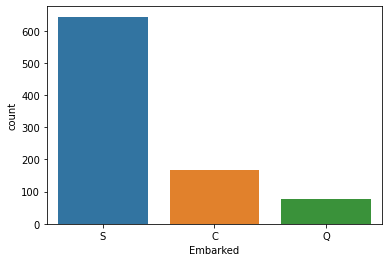

In [764]:
#determine most frequent item to fill missing value with it
sns.countplot(x='Embarked',data=dataset)

In [765]:
#taking care of embarked and cabin missing values
dataset['Cabin'].fillna(value='0',inplace=True)#fill Cabin missing value by zero 
dataset['Embarked'].fillna(value='S',inplace=True)#Fill missing value in Embarked with S because it's most frequent item
#we will leave missing values of age and will handle it by simple imputer

In [766]:
#print describtion for dataset 
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [767]:
#we remove all numbers and assume that Cabin has class from the letters ex.(E,C) classes
dataset.Cabin = dataset.Cabin.map(lambda l : str(l)[0])

# Check relations between attributes and survived 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

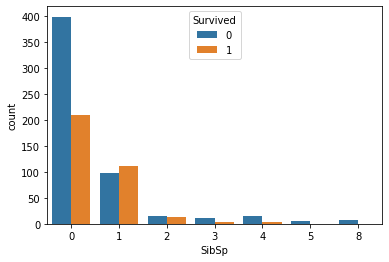

In [768]:
# relation between SibSp and survived
sns.countplot(x='SibSp', hue='Survived',data=dataset)

<AxesSubplot:xlabel='Sex', ylabel='count'>

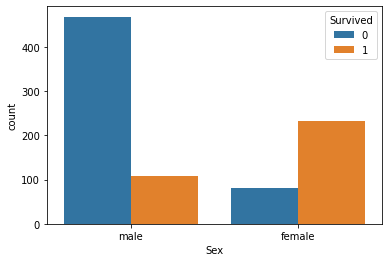

In [769]:
# relation between Sex and survived
sns.countplot(x='Sex', hue='Survived',data=dataset)

<AxesSubplot:xlabel='Parch', ylabel='count'>

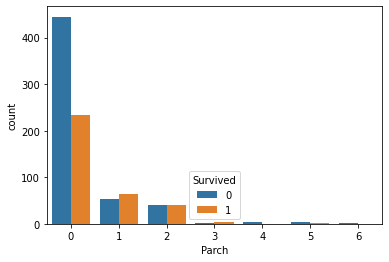

In [770]:
# relation between Parch and survived
sns.countplot(x='Parch', hue='Survived',data=dataset)

# put dependant and independant variables in array


In [771]:
#make independant variables in X
X = dataset.iloc[:, 2:].values
#make dependant variables in y
y = dataset.iloc[:, 1].values

In [772]:
print(X)

[[3 'male' 22.0 ... 7.25 '0' 'S']
 [1 'female' 38.0 ... 71.2833 'C' 'C']
 [3 'female' 26.0 ... 7.925 '0' 'S']
 ...
 [3 'female' nan ... 23.45 '0' 'S']
 [1 'male' 26.0 ... 30.0 'C' 'C']
 [3 'male' 32.0 ... 7.75 '0' 'Q']]


In [773]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

# taking care of Age missing value

In [774]:
#we handle missing values in age by mode(most frequent item) with simple imputer in SKlearn   
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:,[2]])
X[:,[2]] = imputer.transform(X[:, [2]])

In [775]:
print(X)

[[3 'male' 22.0 ... 7.25 '0' 'S']
 [1 'female' 38.0 ... 71.2833 'C' 'C']
 [3 'female' 26.0 ... 7.925 '0' 'S']
 ...
 [3 'female' 24.0 ... 23.45 '0' 'S']
 [1 'male' 26.0 ... 30.0 'C' 'C']
 [3 'male' 32.0 ... 7.75 '0' 'Q']]


# Encoding categorical data



In [776]:
 print(X)

[[3 'male' 22.0 ... 7.25 '0' 'S']
 [1 'female' 38.0 ... 71.2833 'C' 'C']
 [3 'female' 26.0 ... 7.925 '0' 'S']
 ...
 [3 'female' 24.0 ... 23.45 '0' 'S']
 [1 'male' 26.0 ... 30.0 'C' 'C']
 [3 'male' 32.0 ... 7.75 '0' 'Q']]


In [777]:
#encode Embarked by label encoder
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,7] = LE1.fit_transform(X[:,7])
X

array([[3, 'male', 22.0, ..., 7.25, '0', 2],
       [1, 'female', 38.0, ..., 71.2833, 'C', 0],
       [3, 'female', 26.0, ..., 7.925, '0', 2],
       ...,
       [3, 'female', 24.0, ..., 23.45, '0', 2],
       [1, 'male', 26.0, ..., 30.0, 'C', 0],
       [3, 'male', 32.0, ..., 7.75, '0', 1]], dtype=object)

In [778]:
#encode Sex by label encoder
from sklearn.preprocessing import LabelEncoder
LE2 = LabelEncoder()
X[:,1] = LE2.fit_transform(X[:,1])
X

array([[3, 1, 22.0, ..., 7.25, '0', 2],
       [1, 0, 38.0, ..., 71.2833, 'C', 0],
       [3, 0, 26.0, ..., 7.925, '0', 2],
       ...,
       [3, 0, 24.0, ..., 23.45, '0', 2],
       [1, 1, 26.0, ..., 30.0, 'C', 0],
       [3, 1, 32.0, ..., 7.75, '0', 1]], dtype=object)

In [779]:
#encode Cabin by label encoder
from sklearn.preprocessing import LabelEncoder
LE3 = LabelEncoder()
X[:,6] = LE3.fit_transform(X[:,6])
X

array([[3, 1, 22.0, ..., 7.25, 0, 2],
       [1, 0, 38.0, ..., 71.2833, 3, 0],
       [3, 0, 26.0, ..., 7.925, 0, 2],
       ...,
       [3, 0, 24.0, ..., 23.45, 0, 2],
       [1, 1, 26.0, ..., 30.0, 3, 0],
       [3, 1, 32.0, ..., 7.75, 0, 1]], dtype=object)

In [780]:
print(X)

[[3 1 22.0 ... 7.25 0 2]
 [1 0 38.0 ... 71.2833 3 0]
 [3 0 26.0 ... 7.925 0 2]
 ...
 [3 0 24.0 ... 23.45 0 2]
 [1 1 26.0 ... 30.0 3 0]
 [3 1 32.0 ... 7.75 0 1]]


# Splitting the dataset into the Training set and Test set

In [781]:
#split dataset into test and train to evaluate our model after train it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling

In [782]:
# we feature scale Age and Fare to use them more efficently and in a scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [2,5]] = sc.fit_transform(X_train[:, [2,5]])
X_test[:, [2,5]] = sc.transform(X_test[:, [2,5]])

In [783]:
print(X_train[:,[2,5]])

[[-0.3647316048909138 -0.18801432489146527]
 [0.08014177297181682 0.5396904377513654]
 [0.3767240248803039 -0.463502926868237]
 ...
 [-0.5871682938222791 0.8977348711346351]
 [-0.3647316048909138 -0.5272434269334508]
 [-0.5871682938222791 -0.5164399523461265]]


# Training the kernal SVM on the Training set

In [784]:
# train our model to SVM with kernal of guassian rbf there are many kernals but I choose rbf
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",random_state=0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

# predict results of X_test

In [785]:
# predicte result of our test values
y_pred1 = classifier.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [786]:
# we Confusion matrix to evalute our model and to know percantge of accuray of our model prediction
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
#confusion matrix divided into 2 cols and 2 rows
# [0,0] place describe values which was should be 0 and predicted to 0 (right prediction)
# [0,1] place describe values which was should be 0 and predicted to 1 (wrong prediction)
# [1,0] place describe values which was should be 1 and predicted to 0 (wrong prediction)
# [1,1] place describe values which was should be 1 and predicted to 1 (right prediction)

[[93 13]
 [22 51]]


In [787]:
#percentage
accuracy_score(y_test, y_pred1)

0.8044692737430168

# predicte testset retsults

In [788]:
#first import testset 
testset = pd.read_csv('../input/titanic/test.csv')
#then we drop name and ticket because they won't be used in the prediction
testset.drop(columns=["Name","Ticket"],inplace=True)
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [789]:
#check if there is missing values
testset.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [790]:
#fill na in test set in cabin by 0
testset['Cabin'].fillna(value='0',inplace=True)
#fill na in testset in fare
testset['Fare'].fillna(method='backfill',inplace=True)

In [791]:
#remove numbers and leave letters of cabin to be able to encode it
testset.Cabin = testset.Cabin.map(lambda l : str(l)[0])

In [792]:
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,0,Q
1,893,3,female,47.0,1,0,7.0000,0,S
2,894,2,male,62.0,0,0,9.6875,0,Q
3,895,3,male,27.0,0,0,8.6625,0,S
4,896,3,female,22.0,1,1,12.2875,0,S


# put test set in variable

In [793]:
X_testset=testset.iloc[:,1:].values

In [794]:
X_testset

array([[3, 'male', 34.5, ..., 7.8292, '0', 'Q'],
       [3, 'female', 47.0, ..., 7.0, '0', 'S'],
       [2, 'male', 62.0, ..., 9.6875, '0', 'Q'],
       ...,
       [3, 'male', 38.5, ..., 7.25, '0', 'S'],
       [3, 'male', nan, ..., 8.05, '0', 'S'],
       [3, 'male', nan, ..., 22.3583, '0', 'C']], dtype=object)

# fill missing value in testset

In [795]:
#fill na in age by using imputer that we use in dataset while we train our model
X_testset[:,[2]]=imputer.transform(X_testset[:, [2]])

# Encoding of test set

**we use here encoding we used while we train our model**

In [796]:
#encode Embarked
X_testset[:,7] = LE1.transform(X_testset[:,7])

In [797]:
#encode sex
X_testset[:,1] = LE2.transform(X_testset[:,1])

In [798]:
#encode cabin
X_testset[:,6] = LE3.transform(X_testset[:,6])

# apply featuer scaling on testset

In [799]:
# we apply feature scale we used in train model also
X_testset[:, [2,5]] = sc.transform(X_testset[:, [2,5]])

# get result of prediction of testset

In [800]:
# then we get our prediction
y_pred=classifier.predict(X_testset)

In [801]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 0 1 0 0 0]


# output a csv

In [802]:
# we put Passenger ID and Servived prediction in Dataframe then we output this data frame as CSV
sub = pd.DataFrame({'PassengerId': testset.PassengerId, 'Survived' : y_pred})
sub.to_csv("Final_dataset.csv", index=False)